In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# step 1 :  load the data

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
# print data
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# step 2 : Domain Analysis
## create a model that can predict whether the transaction is normal or  fraud ,so we can save the money and fraud type transaction

In [16]:
# basic cheks 
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [17]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [18]:
data.info()
# there is no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [19]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [21]:
data.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# step 3 : feature engineering 

In [23]:
# cheking for missing  values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
# distribution of normal transaction and fraud transaction
data['Class'].value_counts()
# there are 284315 normal transaction and 492 fraud transaction it means data  in not balanced

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
# 0 --> normal transaction
# 1 --> fraud transaction
## seperating this data for analysis 

In [6]:
normal =data[data.Class==0]
fraud=data[data.Class==1]

In [7]:
# print shape of this two variables
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [8]:
# statistical analysis of normal with respect to amount
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
# statistical analysis of fraud with respect to amount
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
###  we observed that mean of fraud detection is more than mean of normal transaction

In [11]:
# comparing values for both transaction 
data.groupby('Class').mean()
# there is huge different in both the clases with repected to specific column

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [12]:
# as we see there is highly unbalanced data therefore we perform undersampling and build a dataset that containing similar distribution of both transaction
# taking a sample from normal transaction that is equal to 492.
normal_sample=normal.sample(n=492)

In [13]:
# concatenating two dataset i.e normal_sample and fraud transaction
new_data=pd.concat([normal_sample,fraud],axis=0)

In [14]:
# print first five rows of new dataset
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
283541,171673.0,2.042492,-0.052602,-1.161447,0.217789,0.139733,-0.687551,0.128052,-0.211936,0.185139,...,-0.249576,-0.581321,0.278868,-0.314542,-0.259335,0.195668,-0.069848,-0.071674,1.79,0
271504,164603.0,-0.320414,-0.661262,0.717266,-1.934431,0.113621,-1.274180,0.340954,-0.346625,1.712232,...,-0.188465,-0.072129,0.714835,-0.045550,-0.980739,-0.629110,-0.045222,-0.151540,19.85,0
259797,159277.0,2.124443,-1.036695,0.360633,-0.820695,-1.612592,-0.388767,-1.517095,-0.017526,0.281773,...,0.463044,1.490933,0.197380,0.058668,-0.402654,-0.106891,0.065895,-0.029098,4.70,0
76305,56505.0,1.022639,-0.523624,1.547894,1.722286,-1.393319,0.339776,-0.881112,0.321825,1.816904,...,-0.172800,-0.159739,-0.073286,0.394404,0.487748,-0.338602,0.083693,0.041218,51.34,0
85399,60756.0,-0.801547,0.789186,1.068296,0.876814,0.814032,-0.850838,0.564893,-0.202386,-0.581410,...,0.098122,0.500930,-0.257141,0.087974,-0.119076,-0.307667,0.345303,0.221755,19.95,0


In [15]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [16]:
new_data['Class'].value_counts()
# distribution of transaction is now balanced

Class
0    492
1    492
Name: count, dtype: int64

In [17]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94015.363821,-0.027819,0.032189,0.087558,-0.036955,0.071520,-0.107597,-0.038722,-0.013714,0.002435,...,-0.024412,-0.075402,-0.002205,-0.034309,0.048323,-0.008258,-0.019957,0.015855,-0.013692,70.488293
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


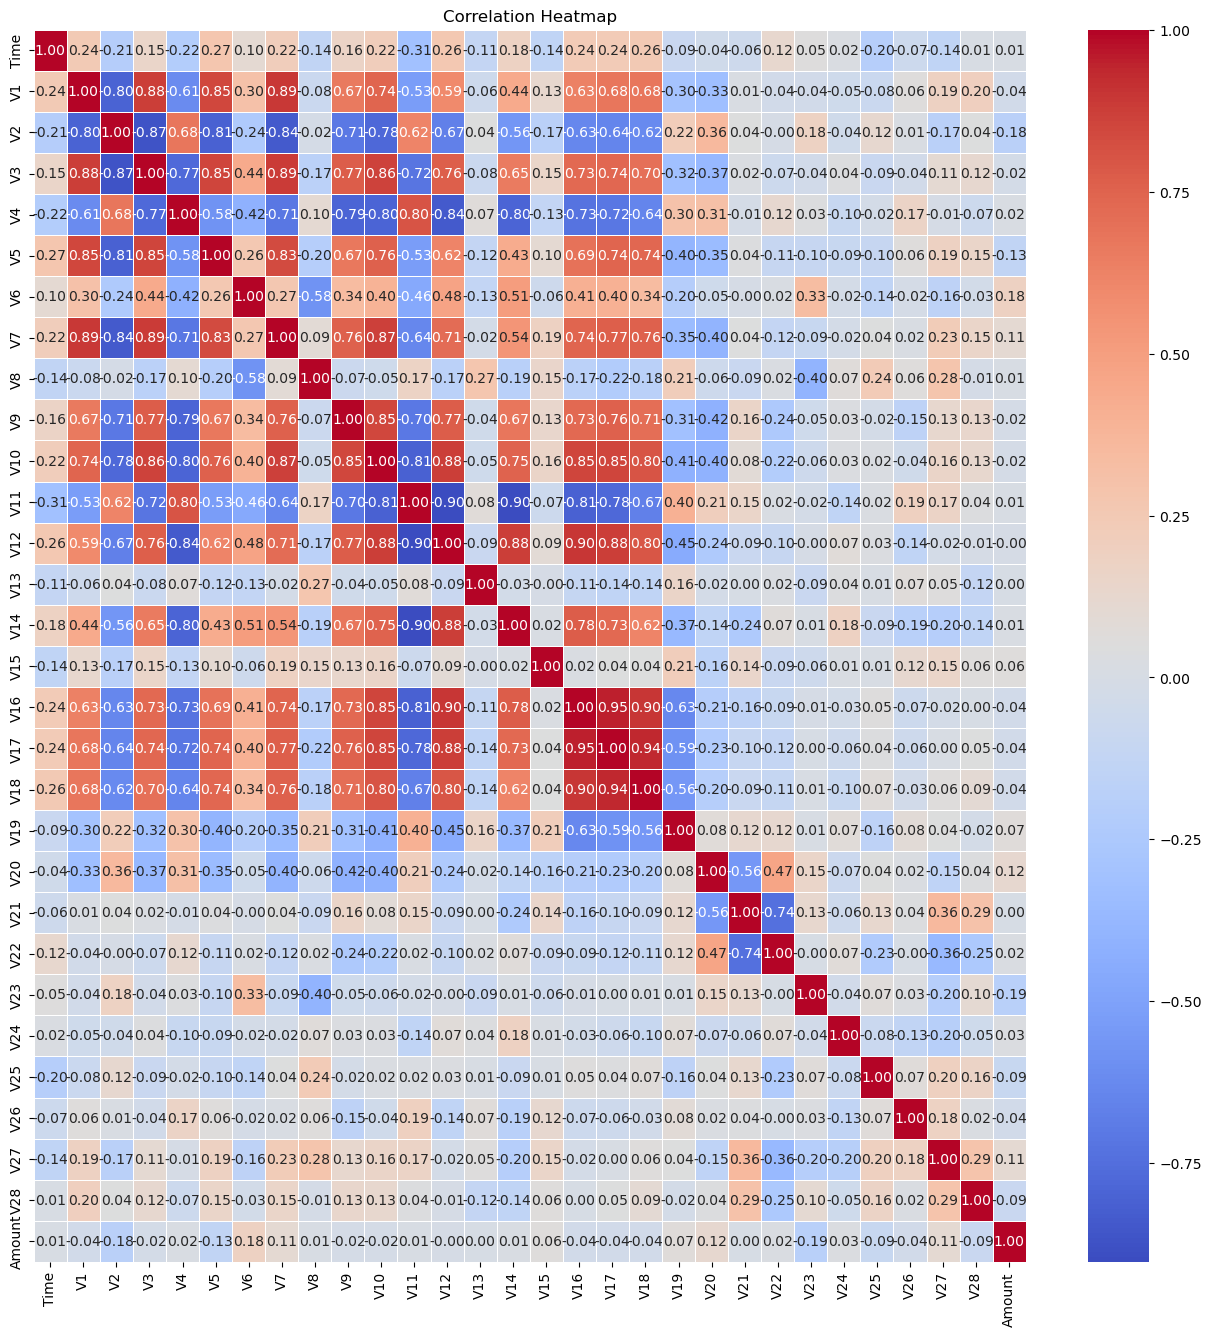

In [18]:
correlation_matrix = new_data.drop(columns=['Class']).corr()
plt.figure(figsize=(16, 16))  
sns.heatmap(correlation_matrix ,annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# step 5 : Perform train test split

In [18]:

X =new_data.drop(columns='Class',axis=1)
Y =new_data['Class']

In [19]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
219073  141586.0 -1.402195 -0.167498  0.353180 -1.245957  3.670590  3.800648   
238348  149634.0 -3.518882  3.659039 -1.155448 -1.063881 -0.407582  0.937598   
109056   71194.0  1.341881 -0.451248  0.554999 -0.636259 -1.099905 -0.779876   
146657   87806.0 -0.090395  1.945630  0.110409  3.576817  1.808763  0.116459   
240626  150687.0  0.033045  0.585650 -1.755328 -1.518466  2.973046  3.300455   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [20]:
print(Y)

219073    0
238348    0
109056    0
146657    0
240626    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [21]:
# spliting data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
X_train.shape

(787, 30)

In [23]:
Y_train.shape

(787,)

In [24]:
X_test.shape

(197, 30)

In [25]:
Y_test.shape

(197,)

# step 6 : model creation  

## 1. Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression
# Initialize and train model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, Y_train)
y_pred = log_reg.predict(X_test)

In [29]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0],
      dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(Y_test,y_pred)
f1=f1_score(Y_test,y_pred)
recall=recall_score(Y_test,y_pred)
precision=precision_score(Y_test,y_pred)
print("Accuracy score is:",acc)
print("f1 score is :",f1)
print("recall score is:",recall)
print("precision score is:",precision)



Accuracy score is: 0.9289340101522843
f1 score is : 0.9285714285714286
recall score is: 0.8921568627450981
precision score is: 0.9680851063829787


## 2. Support vector machine

In [36]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=42)
svm.fit(X_train, Y_train)



SVC(C=1, class_weight='balanced', random_state=42)

In [37]:
y_pred_svm = svm.predict(X_test)

In [38]:
acc=accuracy_score(Y_test,y_pred_svm)
f1=f1_score(Y_test,y_pred_svm)
recall=recall_score(Y_test,y_pred_svm)
precision=precision_score(Y_test,y_pred_svm)
print("Accuracy score is:",acc)
print("f1 score is :",f1)
print("recall score is:",recall)
print("precision score is:",precision)


Accuracy score is: 0.5736040609137056
f1 score is : 0.6216216216216216
recall score is: 0.6764705882352942
precision score is: 0.575


## 3. random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
random_forest.fit(X_train, Y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [40]:
y_pred_rf = random_forest.predict(X_test)

In [41]:
acc=accuracy_score(Y_test,y_pred_rf)
f1=f1_score(Y_test,y_pred_rf)
recall=recall_score(Y_test,y_pred_rf)
precision=precision_score(Y_test,y_pred_rf)
print("Accuracy score is:",acc)
print("f1 score is :",f1)
print("recall score is:",recall)
print("precision score is:",precision)

Accuracy score is: 0.9390862944162437
f1 score is : 0.9387755102040817
recall score is: 0.9019607843137255
precision score is: 0.9787234042553191


# conclusion :
# 1. Logistic regression
### Accuracy score is: 0.9289340101522843
### f1 score is : 0.9285714285714286
### recall score is: 0.8921568627450981
### precision score is: 0.9680851063829787

# 2. SVC (support vector machine):
### Accuracy score is: 0.5736040609137056
### f1 score is : 0.6216216216216216
### recall score is: 0.6764705882352942
### precision score is: 0.575

# 3.random forest :
### Accuracy score is: 0.9390862944162437
### f1 score is : 0.9387755102040817
### recall score is: 0.9019607843137255
### precision score is: 0.9787234042553191

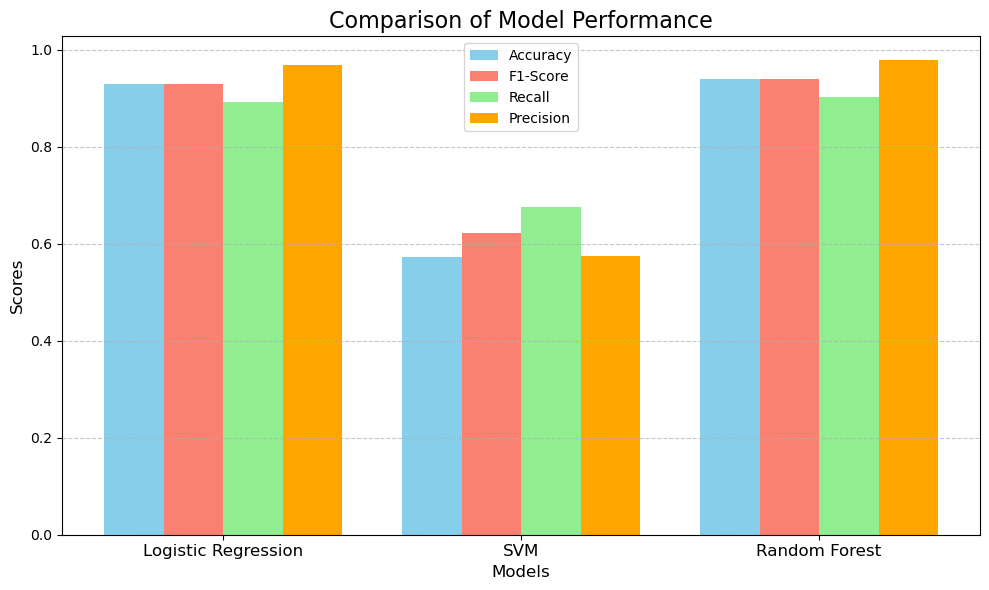

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["Logistic Regression", "SVM", "Random Forest"]

# Metrics for each model
accuracy = [0.9289, 0.5736, 0.9391]
f1_score = [0.9286, 0.6216, 0.9388]
recall = [0.8922, 0.6765, 0.9020]
precision = [0.9681, 0.575, 0.9787]

# Plot settings
x = np.arange(len(models))  # Position of bars
width = 0.2  # Width of each bar

# Create subplots for better readability
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each metric
ax.bar(x - width * 1.5, accuracy, width, label="Accuracy", color="skyblue")
ax.bar(x - width / 2, f1_score, width, label="F1-Score", color="salmon")
ax.bar(x + width / 2, recall, width, label="Recall", color="lightgreen")
ax.bar(x + width * 1.5, precision, width, label="Precision", color="orange")

# Add labels, title, and legend
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title("Comparison of Model Performance", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend()

# Add gridlines for better readability
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


# Best Model: Random Forest

## It outperformed Logistic Regression and SVM in terms of accuracy, F1-score, precision, and recall.
## Suitable for imbalanced datasets like fraud detection due to its ability to handle complex patterns.

# Secondary Option: Logistic Regression

## Good performance with slightly lower recall compared to Random Forest.
## Less computationally expensive, making it suitable for simpler implementations